# Data Wrangling - NLP
Now that we have dataset with features we're initially interested and lyrics (!), we'll use `NLTK` to do some NLP and extract some interesting features.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]

In [91]:
df_proc1 = pd.read_feather('../data/processed/stage1_lyrics.feather')
df_proc1 = df_proc1.loc[df_proc1['lyrics'] != ''].reset_index()

In [92]:
df_proc1.shape

(2433, 24)

In [93]:
df_proc1.dtypes

index                          int64
songid                        object
spotify_track_id              object
artist_genre                  object
spotify_track_duration_ms    float64
spotify_track_popularity     float64
danceability                 float64
energy                       float64
key                          float64
loudness                     float64
mode                            bool
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
time_signature               float64
performer                     object
song                          object
lyrics                        object
peak_position                  int64
weeks_on_chart                 int64
instance                       int64
dtype: object

In [170]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def clean_lyrics(row):
    """Remove punctuation or other characters that might skew analysis.
    
    Returns:
        lyrics_proc(list): tokenized list of words in lyrics
    
    """
    lyrics_proc = row['lyrics'].replace('\n', ' ')
    # Lyrics from Genius contain bracket delimited text indicating who
    # is singing.
    lyrics_proc = re.sub(r'\[.*?\]', '', lyrics_proc) 
    tokenizer = RegexpTokenizer(r'\w+')
    lyrics_proc = tokenizer.tokenize(lyrics_proc)
    lyrics_proc = [w for w in lyrics_proc 
                   if w not in stopwords.words('english') 
                   and len(w) > 1 
                   and w not in ['na','la']]
    return lyrics_proc 

def word_count(row):
    """Simple count of words in lyrics. Minor clean up done
    Requires an input column of tokenized lyrics.
    
    """
    wc = len(row['lyrics_proc'])
    return wc

def vocab_count(row):
    """Vocabulary count
    """
    vocab_count = len(set(row['lyrics_proc']))
    return vocab_count

def lex_div(row):
    """Determine lexical richness of lyrics. """
    return row['vocab_count'] / row['word_count']


    
    

In [95]:
str_test = df_proc1['lyrics'][0].replace('\n', ' ')
#str_test = re.sub(r'\[.*?\]', '', str_test)

In [97]:
df_proc1['lyrics']

0       [Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...
1       Jean, Jean, roses are red\nAll the leaves have...
2       [Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...
3       [Chorus]\nI've got to get away, I've got to ge...
4       #\n2Pac - Picture Me Rollin'\n50 Cent - Get In...
                              ...                        
2428    Part. 1 (Big Boi ft. Sleepy Brown - The Way Yo...
2429    [Verse 1]\nWoke up this morning with a smile o...
2430    [Verse 1]\nYou say you got a girl\nYeah, how y...
2431    [Intro: Andre 3000]\n"Okay, here we go..."\nYe...
2432    [Chorus: Flaj]\nWhat we see (what we see) ever...
Name: lyrics, Length: 2433, dtype: object

In [98]:
df_proc1['lyrics_proc'] = df_proc1.apply(clean_lyrics, axis=1)
df_proc1['word_count'] = df_proc1.apply(word_count, axis=1)
df_proc1['vocab_count'] = df_proc1.apply(vocab_count, axis=1)
df_proc1['lex_div'] = df_proc1.apply(lex_div, axis=1)

In [99]:
df_proc1.head()

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
0,0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,...,Snoop Doggy Dogg,Gin And Juice,[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...,8,20,1,"[Ugh, Ha, ha, ha, serious, nigga, One, niggas,...",344,184,0.534884
1,1,JeanOliver,5v4sUZA2Oyni7EtBL586V7,['alternative hip hop'],200066.0,29.0,0.323,0.127,3.0,-15.660,...,Oliver,Jean,"Jean, Jean, roses are red\nAll the leaves have...",2,14,1,"[Jean, Jean, roses, red, All, leaves, gone, gr...",89,51,0.573034
2,2,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,...,Chingy Featuring Ludacris & Snoop Dogg,Holidae In,"[Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...",3,21,1,"[Bomb, ass, pussy, Ma, ooh, got, bomb, know, g...",563,296,0.525755
3,3,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,...,Bobby Brown,Get Away,"[Chorus]\nI've got to get away, I've got to ge...",14,16,1,"[got, get, away, got, get, away, got, get, awa...",322,148,0.459627
4,4,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,...,Coolio,Fantastic Voyage,#\n2Pac - Picture Me Rollin'\n50 Cent - Get In...,3,25,1,"[2Pac, Picture, Me, Rollin, 50, Cent, Get, In,...",321,235,0.732087


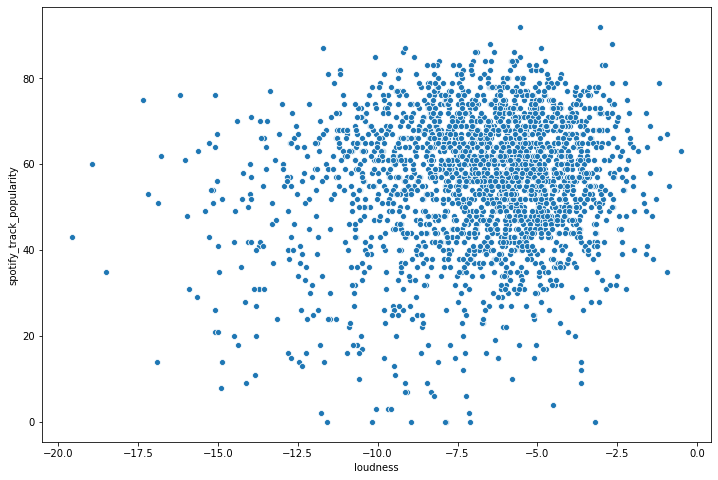

In [100]:
sns.scatterplot(data=df_proc1, y='spotify_track_popularity', x='loudness')

In [164]:
foo = df_proc1[df_proc1.artist_genre.str.contains('rap')]
(
    foo.groupby('performer').
    agg({'vocab_count': 'mean'}).
    reset_index().
    sort_values(by='vocab_count', ascending=False).
    head(50)
)

,performer,vocab_count
236,Da Brat Featuring Cherish,7617.000000
161,Candy & The Kisses,5759.000000
738,Method Man,2870.666667
2,112 Featuring Lil'z,2722.000000
876,Pitbull Featuring Ke$ha,2722.000000
243,Danny & The Juniors,1962.500000
85,Baby Boy Da Prince Featuring Lil Boosie,1820.000000
909,Queen Latifah Featuring Apache,1820.000000
917,Redman Featuring DJ Kool,1820.000000
537,Junior M.A.F.I.A. Featuring The Notorious B.I.G.,1820.000000


In [183]:
(
    foo.groupby('performer').
    agg({'lex_div': 'max'}).
    reset_index().
    sort_values(by='lex_div', ascending=False).
    head(10)
)

,performer,lex_div
1113,Tyga & Justin Bieber,1.000000
59,Action Bronson Featuring Chance The Rapper,0.947368
836,Notorious,0.947368
433,Ghostface Killah,0.929487
524,Joe,0.877193
160,Camp Lo,0.871849
123,Black Moon,0.871849
183,Chubb Rock,0.871849
1045,The Pharcyde,0.871849
975,Smif-N-Wessun,0.871595


In [110]:
df_proc1.loc[df_proc1.lex_div >= .95]

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
1578,1651,Swag Surfin'F.L.Y. (Fast Life Yungstaz),5ItzU5pBrFmRUudfr5RkJP,['atl hip hop'],249920.0,55.0,0.734,0.921,11.0,-5.663,...,F.L.Y. (Fast Life Yungstaz),Swag Surfin',"Lil Wayne - ""I'm Me""\nDorrough - ""Ice Cream Pa...",62,11,1,"[Lil, Wayne, Me, Dorrough, Ice, Cream, Paint, ...",47,46,0.978723
2200,2294,Wait For A MinuteTyga & Justin Bieber,1AcJJerSHcXCnevx9oSoWe,"['hip hop', 'pop rap', 'rap', 'trap']",207013.0,59.0,0.830,0.341,4.0,-10.625,...,Tyga & Justin Bieber,Wait For A Minute,Ssss,68,1,1,[Ssss],1,1,1.000000


In [131]:
foo.sort_values(by='weeks_on_chart', ascending=False).head(10)

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,performer,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div
2112,2203,Too CloseNext,5IFCyWplye09HytIP80RCF,"['boy band', 'dance pop', 'hip pop', 'minneapo...",259440.0,66.0,0.847,0.402,7.0,-9.952,...,Next,Too Close,[Intro]\nI wonder if she could tell I'm hard r...,1,53,1,"[wonder, could, tell, hard, right, Yeah, come,...",257,73,0.284047
2129,2221,Trap QueenFetty Wap,2d8JP84HNLKhmd6IYOoupQ,"['new jersey rap', 'pop rap', 'rap', 'southern...",222093.0,74.0,0.746,0.873,7.0,-3.803,...,Fetty Wap,Trap Queen,"[Intro]\nRGF productions\nRemy Boyz, yah-ah\n1...",2,52,1,"[RGF, productions, Remy, Boyz, yah, ah, 1738, ...",348,155,0.445402
1590,1663,See You AgainWiz Khalifa Featuring Charlie Puth,2JzZzZUQj3Qff7wapcbKjc,"['hip hop', 'pittsburgh rap', 'pop rap', 'rap'...",229525.0,81.0,0.689,0.481,10.0,-7.503,...,Wiz Khalifa Featuring Charlie Puth,See You Again,1. Lean On - Major Lazer x DJ Snake feat. MØ\n...,1,52,1,"[Lean, On, Major, Lazer, DJ, Snake, feat, MØ, ...",248,210,0.846774
2207,2301,The HillsThe Weeknd,7fBv7CLKzipRk6EC6TWHOB,"['canadian contemporary r&b', 'canadian pop', ...",242253.0,82.0,0.580,0.565,0.0,-7.065,...,The Weeknd,The Hills,[Intro]\nYeah\nYeah\nYeah\n\n[Verse 1]\nYour m...,1,48,1,"[Yeah, Yeah, Yeah, Your, man, road, doin, prom...",214,93,0.434579
1784,1861,You Make Me Wanna...Usher,47TqCCnEliDp8NRDyIQoQq,"['atl hip hop', 'dance pop', 'pop', 'pop rap',...",219120.0,69.0,0.761,0.639,5.0,-7.577,...,Usher,You Make Me Wanna...,"[Intro: Jermaine Dupri]\nThis is what you do, ...",2,47,1,"[This, This, You, make, wanna, leave, one, Sta...",272,82,0.301471
1946,2030,ApologizeTimbaland Featuring OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,"['dance pop', 'hip hop', 'hip pop', 'pop', 'po...",184400.0,62.0,0.654,0.610,8.0,-6.051,...,Timbaland Featuring OneRepublic,Apologize,I'm holding on your rope\nGot me ten feet off ...,2,47,2,"[holding, rope, Got, ten, feet, ground, And, h...",101,54,0.534653
1340,1395,"Give Me EverythingPitbull Featuring Ne-Yo, Afr...",4QNpBfC0zvjKqPJcyqBy9W,"['dance pop', 'latin', 'miami hip hop', 'pop',...",252306.0,78.0,0.671,0.939,8.0,-3.206,...,"Pitbull Featuring Ne-Yo, Afrojack & Nayer",Give Me Everything,"[Letra de ""Give Me Everything (Tradução)"" Part...",1,45,1,"[Não, estou, trabalhando, duro, certo, fotogra...",538,161,0.299257
2318,2417,Yeah!Usher Featuring Lil Jon & Ludacris,5rb9QrpfcKFHM1EUbSIurX,"['atl hip hop', 'dance pop', 'pop', 'pop rap',...",250373.0,81.0,0.894,0.791,2.0,-4.699,...,Usher Featuring Lil Jon & Ludacris,Yeah!,[Produced by Lil Jon]\n\n[Intro: Usher & Lil J...,1,45,1,"[Peace, Town, Yeah, Okay, Lil, Jon, Yeah, yeah...",415,176,0.424096
397,424,RedboneChildish Gambino,0wXuerDYiBnERgIpbb3JBR,"['atl hip hop', 'hip hop', 'pop rap', 'rap']",326933.0,82.0,0.743,0.347,1.0,-11.174,...,Childish Gambino,Redbone,[Verse 1]\nDaylight\nI wake up feeling like yo...,12,44,3,"[Daylight, wake, feeling, like, play, right, u...",181,73,0.403315
513,544,I Wanna KnowJoe,1m2xMsxbtxv21Brome189p,"['dance pop', 'east coast hip hop', 'gangster ...",296693.0,66.0,0.725,0.487,8.0,-5.959,...,Joe,I Wanna Know,"[Intro]\nYeah, oh yeah\nAlright, oh, oh, oh\n\...",4,44,1,"[Yeah, oh, yeah, Alright, oh, oh, oh, It, amaz...",237,88,0.371308


In [121]:
for i in (df_proc1[df_proc1.songid == 'You Make Me Wanna...Usher']['artist_genre']):
    print(i)

['atl hip hop', 'dance pop', 'pop', 'pop rap', 'r&b', 'urban contemporary']


In [126]:
df_proc1.shape

(2433, 28)

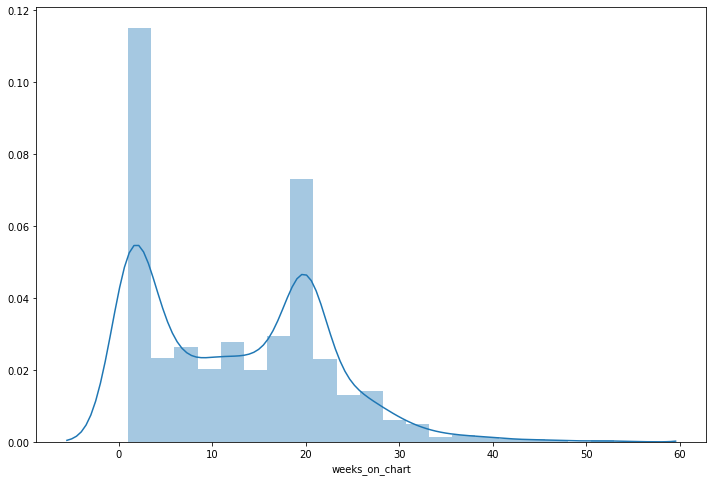

In [132]:
sns.distplot(foo.weeks_on_chart)

In [175]:
def label_track(row):
    if (row['weeks_on_chart'] >= 20) | (row['peak_position'] <= 20):
        return('hit')
    else:
        return('not hit')

In [176]:
foo['label'] = ''
foo['label'] = foo.apply(label_track, axis=1)

/Users/kai/anaconda3/envs/kai/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kai/anaconda3/envs/kai/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [177]:
foo

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,label
0,0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,...,Gin And Juice,[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...,8,20,1,"[Ugh, Ha, ha, ha, serious, nigga, One, niggas,...",344,184,0.534884,hit
2,2,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,...,Holidae In,"[Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...",3,21,1,"[Bomb, ass, pussy, Ma, ooh, got, bomb, know, g...",563,296,0.525755,hit
3,3,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,...,Get Away,"[Chorus]\nI've got to get away, I've got to ge...",14,16,1,"[got, get, away, got, get, away, got, get, awa...",322,148,0.459627,hit
4,4,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,...,Fantastic Voyage,#\n2Pac - Picture Me Rollin'\n50 Cent - Get In...,3,25,1,"[2Pac, Picture, Me, Rollin, 50, Cent, Get, In,...",321,235,0.732087,hit
5,5,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,...,I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"[The, Rap, Genius, Editors, Pick, Their, Own, ...",2651,932,0.351565,hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2530,The Way That You TalkJagged Edge Featuring Da ...,7w1cDpTllrHTwckLaMSGw9,"['atl hip hop', 'dance pop', 'hip hop', 'hip p...",218933.0,25.0,0.857,0.563,0.0,-9.566,...,The Way That You Talk,"[Verse 1: Da Brat]\nIt's scarey, I'm a subsidi...",65,9,1,"[It, scarey, subsidiary, So, So, Def, next, Ja...",293,194,0.662116,not hit
2428,2531,The Way You MoveOutKast Featuring Sleepy Brown,5z7mYFfhw6N6f23VwrokJD,"['atl hip hop', 'dirty south rap', 'hip hop', ...",234000.0,66.0,0.871,0.597,5.0,-4.932,...,The Way You Move,Part. 1 (Big Boi ft. Sleepy Brown - The Way Yo...,1,39,1,"[Part, Big, Boi, ft, Sleepy, Brown, The, Way, ...",596,262,0.439597,hit
2430,2533,The WeekendSZA,6gU9OKjOE7ghfEd55oRO57,"['hip hop', 'pop', 'pop rap', 'rap']",272186.0,77.0,0.487,0.366,8.0,-9.405,...,The Weekend,"[Verse 1]\nYou say you got a girl\nYeah, how y...",33,24,1,"[You, say, got, girl, Yeah, want, How, want, g...",181,91,0.502762,hit
2431,2534,The Whole WorldOutKast Featuring Killer Mike,074v54tSEWLbq3Hu5wf6uh,"['atl hip hop', 'dirty south rap', 'hip hop', ...",295346.0,49.0,0.815,0.852,2.0,-6.176,...,The Whole World,"[Intro: Andre 3000]\n""Okay, here we go...""\nYe...",19,20,1,"[Okay, go, Yeah, afraid, like, scared, dog, Bu...",508,265,0.521654,hit


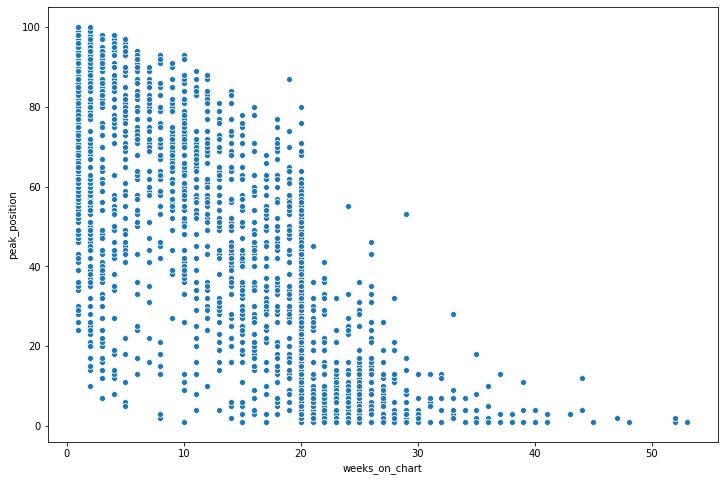

In [178]:
sns.scatterplot(foo.weeks_on_chart, foo.peak_position)

In [179]:
foo.merge(d)

,index,songid,spotify_track_id,artist_genre,spotify_track_duration_ms,spotify_track_popularity,danceability,energy,key,loudness,...,song,lyrics,peak_position,weeks_on_chart,instance,lyrics_proc,word_count,vocab_count,lex_div,label
0,0,Gin And JuiceSnoop Doggy Dogg,0WKYRFtH6KKbaNWjsxqm70,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",211493.0,74.0,0.549,0.853,7.0,-4.293,...,Gin And Juice,[Intro: Daz Dillinger & (Snoop Dogg)]\n(Ugh) H...,8,20,1,"[Ugh, Ha, ha, ha, serious, nigga, One, niggas,...",344,184,0.534884,hit
2,2,Holidae InChingy Featuring Ludacris & Snoop Dogg,0FmCLEHfINGqwlyzvklNqy,"['crunk', 'dance pop', 'dirty south rap', 'gan...",314400.0,63.0,0.810,0.791,7.0,-5.909,...,Holidae In,"[Intro: Snoop Dogg]\nBomb ass pussy\nMa, ooh y...",3,21,1,"[Bomb, ass, pussy, Ma, ooh, got, bomb, know, g...",563,296,0.525755,hit
3,3,Get AwayBobby Brown,62cC8knNydvmC1JPZExWTD,"['dance pop', 'funk', 'hip hop', 'new jack swi...",310497.0,40.0,0.816,0.765,1.0,-6.538,...,Get Away,"[Chorus]\nI've got to get away, I've got to ge...",14,16,1,"[got, get, away, got, get, away, got, get, awa...",322,148,0.459627,hit
4,4,Fantastic VoyageCoolio,3QlTzofanSqDWywxEzGGE2,"['g funk', 'gangster rap', 'hip hop', 'rap', '...",334440.0,51.0,0.888,0.584,7.0,-13.308,...,Fantastic Voyage,#\n2Pac - Picture Me Rollin'\n50 Cent - Get In...,3,25,1,"[2Pac, Picture, Me, Rollin, 50, Cent, Get, In,...",321,235,0.732087,hit
5,5,"I'm On OneDJ Khaled Featuring Drake, Rick Ross...",608a1wIsSd5KzMEqm1O7w3,"['dance pop', 'hip hop', 'miami hip hop', 'pop...",296146.0,68.0,0.508,0.809,11.0,-3.454,...,I'm On One,The Rap Genius Editors Pick Their Own Top 10 S...,10,23,1,"[The, Rap, Genius, Editors, Pick, Their, Own, ...",2651,932,0.351565,hit
